# XGBoost example

**Example using the xgb function in the MLRegression module**

The **xgb** function in the MLRegression module provides output of fitted regression model and summary statistics using the XGBoost function

The **xgb** function standardizes the X input by default. 

This example shows how to cross-validate the model with independent training and testing data subsets before fitting the final model with all of the data.

#### Example data set

This example uses the diabetes data described in the following tutorial by sklearn:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py


Before running this notebook, first install the MLRegression module in your environment, if it is not already installed, using one of the following lines in the next cell:

In [31]:
# # Run the following commands to install MLRegression for the first time
# !pip install git+https://github.com/gjpelletier/MLRegression.git

# # Run the following commands to upgrade MLRegression to the latest versions
# !pip install git+https://github.com/gjpelletier/MLRegression.git --upgrade

## Read X and y from the sklearn diabetes data set

In [32]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True, as_frame=True)

## Split X and y into cross-validation train and test subsets

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model with the training data subset

In the next step, we will specify values for the hyper-parameters for XGBoost in the kwargs dictionary, and then we will fit the model using the training data. 

After this training step is completed, proceed to the next step to check how well the predictions from the training data match the predictions using the testing data. 

If the predictions from the training and testing data are too different from each other, keep trying different values in the kwargs dictionary in the training step. Repeat the training and testing steps until their predictions match each other as closely as possible.

Fitting XGBRegressor model, please wait ...


XGBRegressor statistics of fitted model in model_outputs['stats']:


| Statistic   |   XGBRegressor |
|:------------|---------------:|
| r-squared   |       0.776827 |
| RMSE        |      36.8251   |
| n_samples   |     353        |


Done
Time elapsed: 1.97 sec


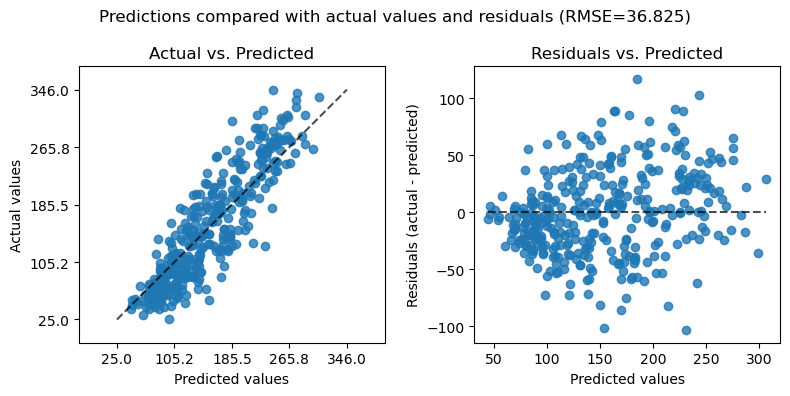

In [34]:
# Specify the kwargs dictionary of hyper-parameters:
kwargs= {
    'learning_rate': 0.018400177415580518,
    'max_depth': 8,
    'min_child_weight': 10,
    'subsample': 0.5236808023845354,
    'colsample_bytree': 0.5268969889241958,
    'gamma': 1.7130314557775375,
    'reg_lambda': 7.954791893523072,
    'alpha': 8.554180870219792,
    'n_estimators': 423}    

# Fit the model with the training data:
from MLRegression import xgb
train_model, train_output = xgb(X_train, y_train, **kwargs)

## Test the model with the testing data subset

In the next step we will check how well the predictions from fitted model match samples from the testing data. 

If the results from this step are too different from the previous step, go back to the training step and try different values in the kwargs dictionary. Repeat the training and testing steps until their results match each other as closely as possible.

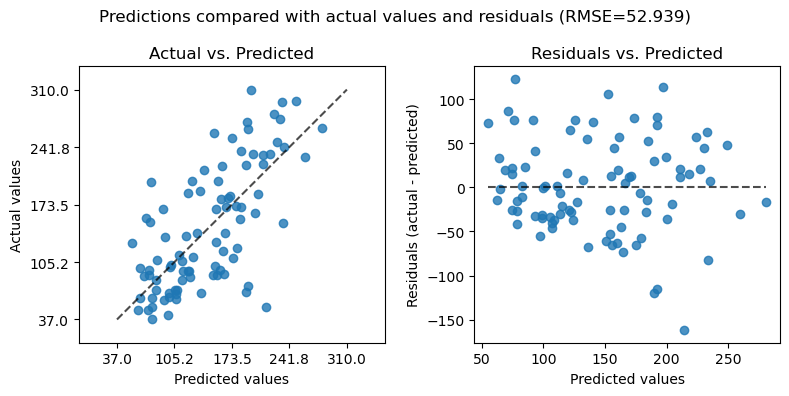

In [35]:
from MLRegression import plot_predictions_from_test
fig = plot_predictions_from_test(train_model, X_test, y_test, scaler=train_output['scaler'])
fig.savefig("XGBRegressor_predictions_test.png", dpi=300)

## Final fit of the model using all of the X and y data

In the next step we will use the final selected hyperparameters in the kwargs dictionary to fit the model using all of the X and y data.

Fitting XGBRegressor model, please wait ...


XGBRegressor statistics of fitted model in model_outputs['stats']:


| Statistic   |   XGBRegressor |
|:------------|---------------:|
| r-squared   |       0.779373 |
| RMSE        |      36.1704   |
| n_samples   |     442        |


Done
Time elapsed: 2.19 sec


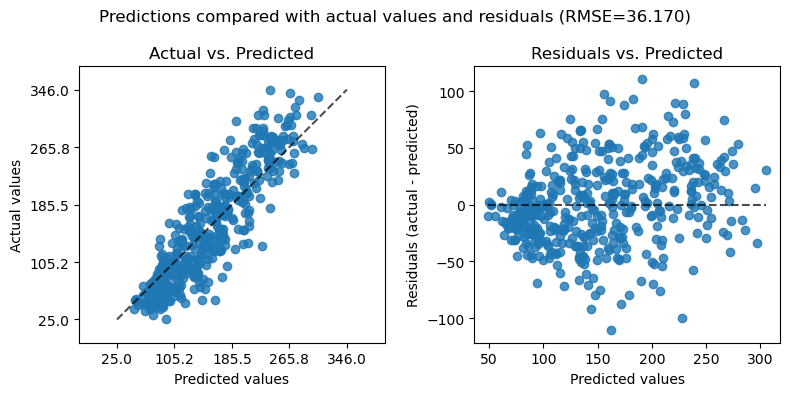

In [36]:
from MLRegression import xgb
final_model, final_output = xgb(X, y, **kwargs)

## User instructions

In [30]:
help(xgb)

Help on function xgb in module MLRegression:

xgb(X, y, **kwargs)
    Linear regression with XGBoost
    Beta version

    by
    Greg Pelletier
    gjpelletier@gmail.com
    03-June-2025

    REQUIRED INPUTS (X and y should have same number of rows and
    only contain real numbers)
    X = dataframe of the candidate independent variables
        (as many columns of data as needed)
    y = dataframe of the dependent variable (one column of data)

    OPTIONAL KEYWORD ARGUMENTS
    **kwargs (optional keyword arguments):
        verbose= 'on' (default) or 'off'
        standardize= 'on' (default) or 'off' where
            'on': standardize X using sklearn.preprocessing StandardScaler
            'off': do not standardize X (only used if X is already standardized)
        gpu= True (default) or False to autodetect if the computer has a gpu and use it
        n_estimators= 100,          # Number of boosting rounds (trees).
        max_depth= 6,               # Maximum depth of a tree.
  